# House Price Prediction using Linear Regression

## Problem Statement:

## Introduction
- Linear Regression is a concept that uses the formula $y = mx + c + \epsilon$
    - y= dependent value which we would like to predict
    - x= independent values which determine the value of y
    - m= slope of x and y
    - c= intercept(value of y when x=0)
    - $\epsilon$ = error difference (difference between observed and predicted values of y)
    - **Equation for multiple regression :** $y= \beta_0 + \beta_1 x_1 + \beta_1 x_2 + \cdots + \beta_n x_n + \epsilon$
    - where: 
        - $y$ is the dependent variable we need to predict
        - $x_1, x_2, \cdots, x_n$ are the independent variables
        - $\beta_0$ is the intercept, i.e value of $y$ when all the indepent variables $x_1, x_2, \cdots, x_n$ are zero
        - $\beta_1, \beta_2, \cdots, \beta_n$ are the coefficients of the dependent variables. Each $\beta_i$ represents the change in $y$ for a one-unit change in $x_i$, holding all other variables constant. These coefficients quantify the contribution of each predictor to the dependent variable.
        - $\epsilon$ is the error term accounts for the variation in $y$ that cannot be explained by the linear relationship with the independent variables. It captures the influence of all other factors not included in the model.
        
## Interpretation

- The equation models the relationship between the dependent variable $y$ and multiple independent variables $x_1,x_2,\cdots,x_n$ The goal is to estimate the coefficients $\beta_0, \beta_1, \beta_2, \cdots, \beta_n$ using a sample of data. Once the model is fitted, it can be used to predict the value of $y$ for given values of the independent variables.  

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # to print heatmap and understand correlations
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.shape

(545, 13)

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Outliers:

- Outliers are data points that differ significantly from other observations in a dataset. They can be unusually high or low values that lie outside the overall pattern of the data. Outliers can occur due to various reasons such as measurement errors, data entry errors, or natural variability in the data.
- In this case, however, we will not be removing any outliers that are observed in the data since the size of the dataset is small and the quantity of outliers is also small.
- In such a case, removing outliers will simply result in a loss of data.

### Exploratory Data Analysis (EDA)

- Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often using visual methods.
- It involves several steps and techniques to understand the data, uncover patterns, spot anomalies, test hypotheses, and check assumptions through statistical and graphical representations.

#### Why is EDA Necessary?

1. Understanding Data:
    - Provides a comprehensive understanding of the data's structure, distribution, and underlying patterns.

2. Detecting Outliers and Anomalies:
    - Identifies unusual data points that may need further investigation or removal.

3. Uncovering Patterns:
    - Helps to discover hidden patterns, trends, and relationships within the data.

4. Informing Data Cleaning:
    - Guides the data cleaning process by highlighting inconsistencies, missing values, and errors.
    
5. Hypothesis Testing:
    - Assists in generating and testing hypotheses about the data, leading to better model selection and feature engineering.

6. Guiding Feature Selection and Engineering:
    - Identifies important variables and suggests ways to transform or create new features for modeling.

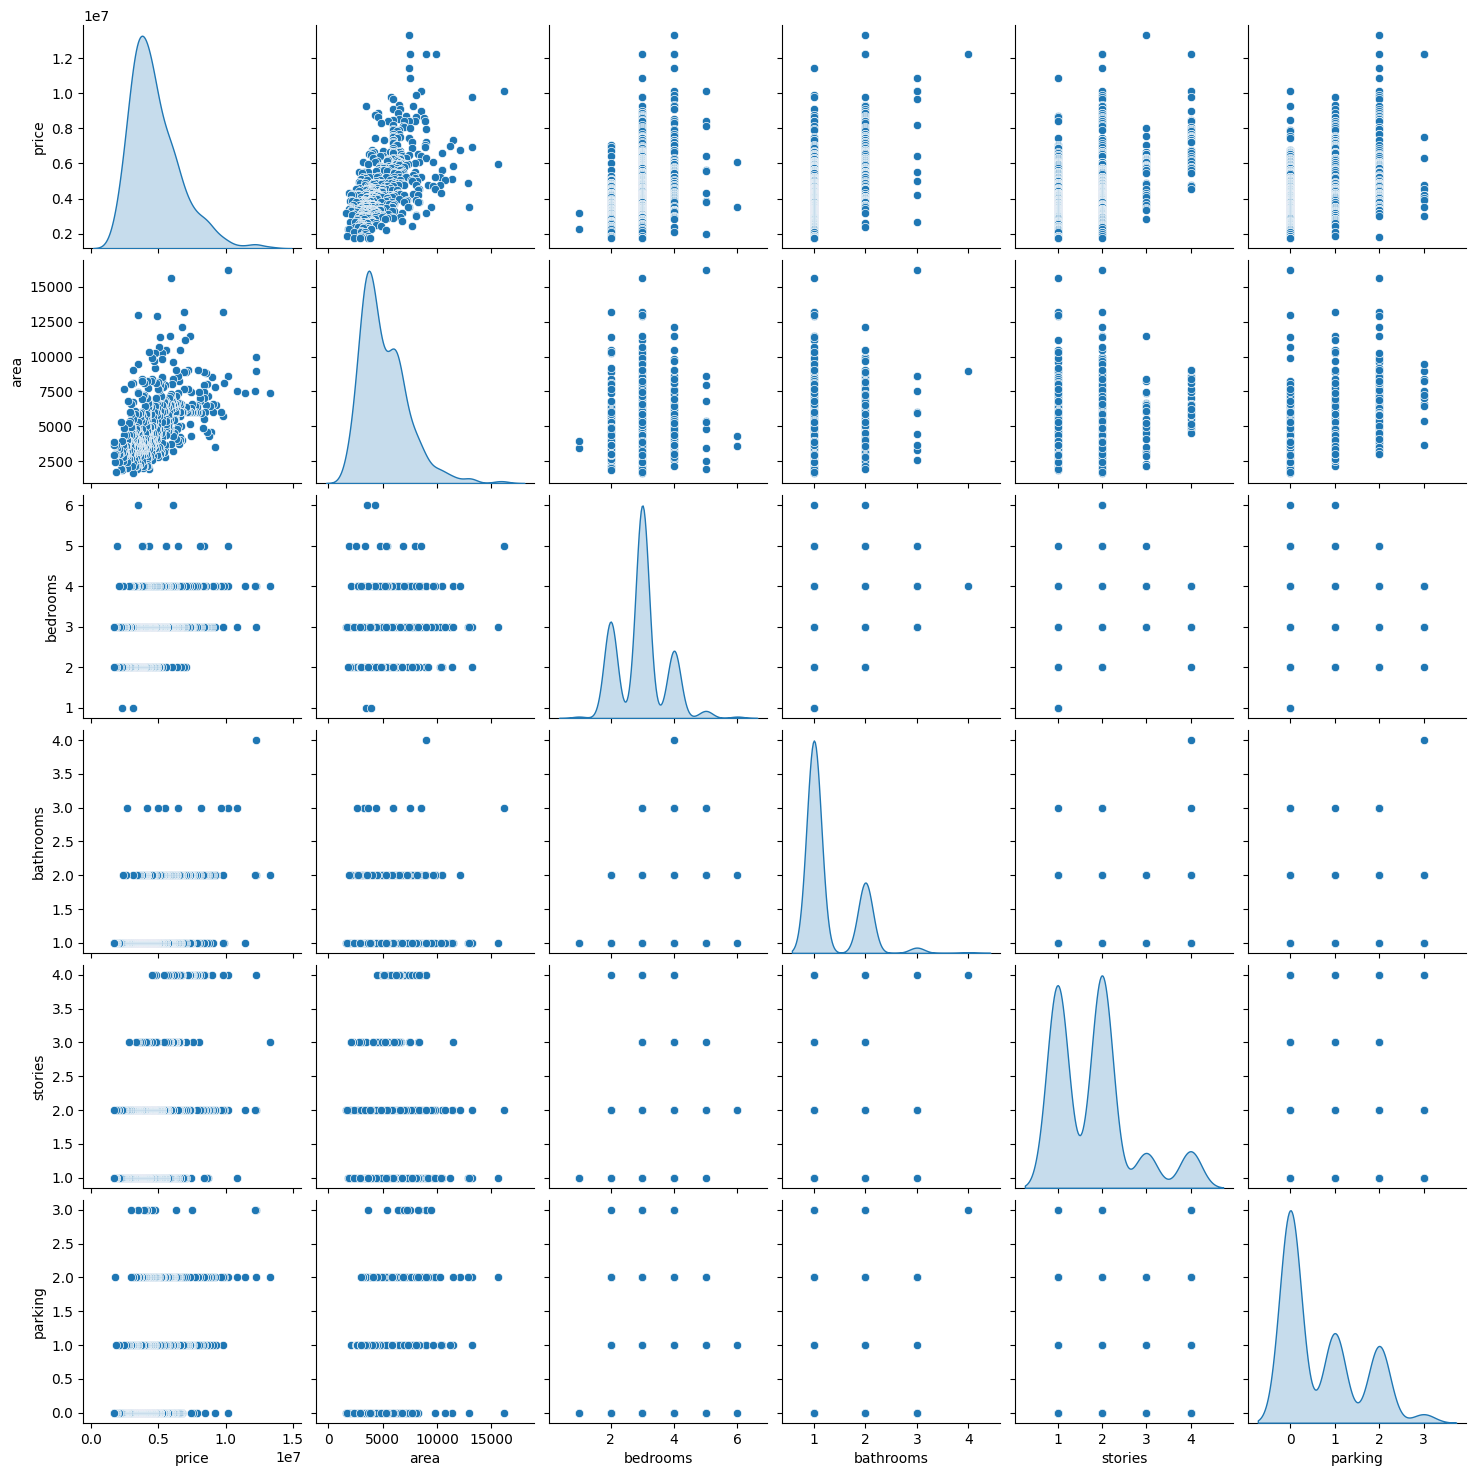

In [10]:
sns.pairplot(df, diag_kind='kde')

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

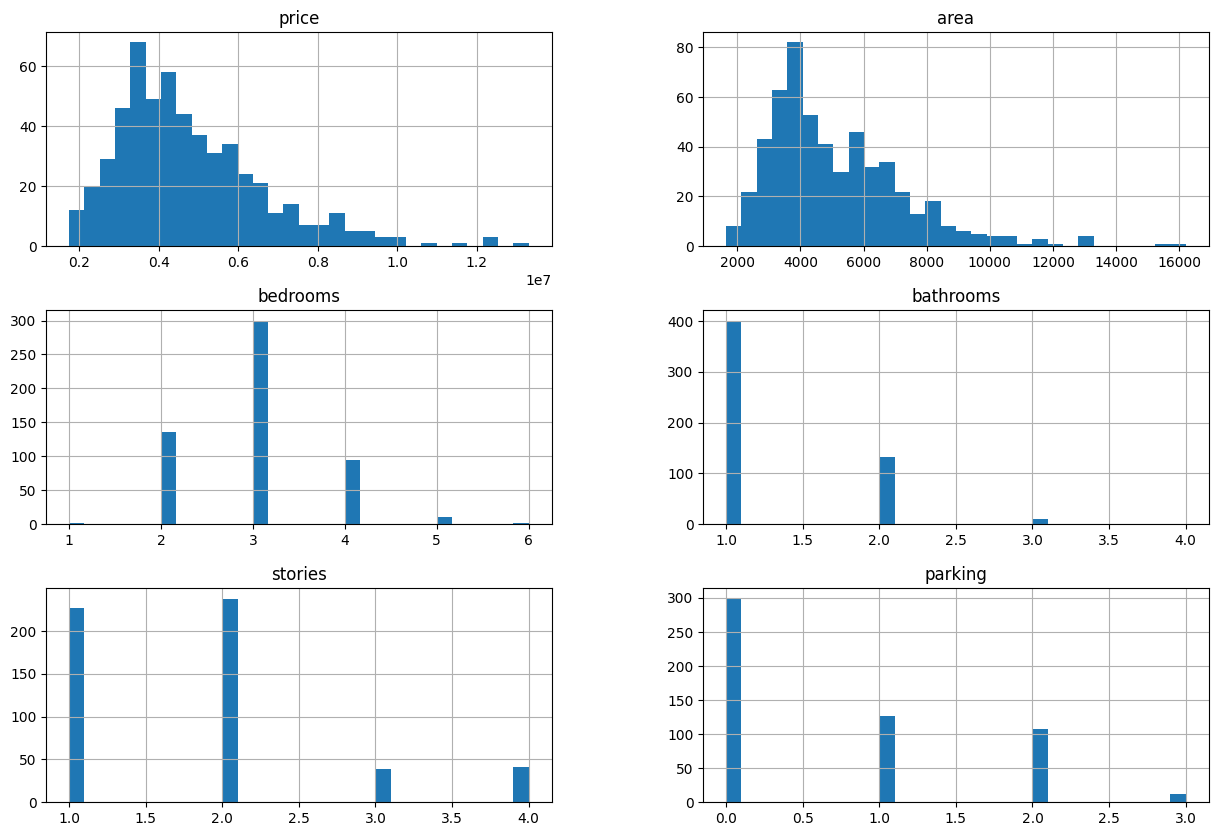

In [11]:
df.hist(bins=30, figsize=(15, 10))

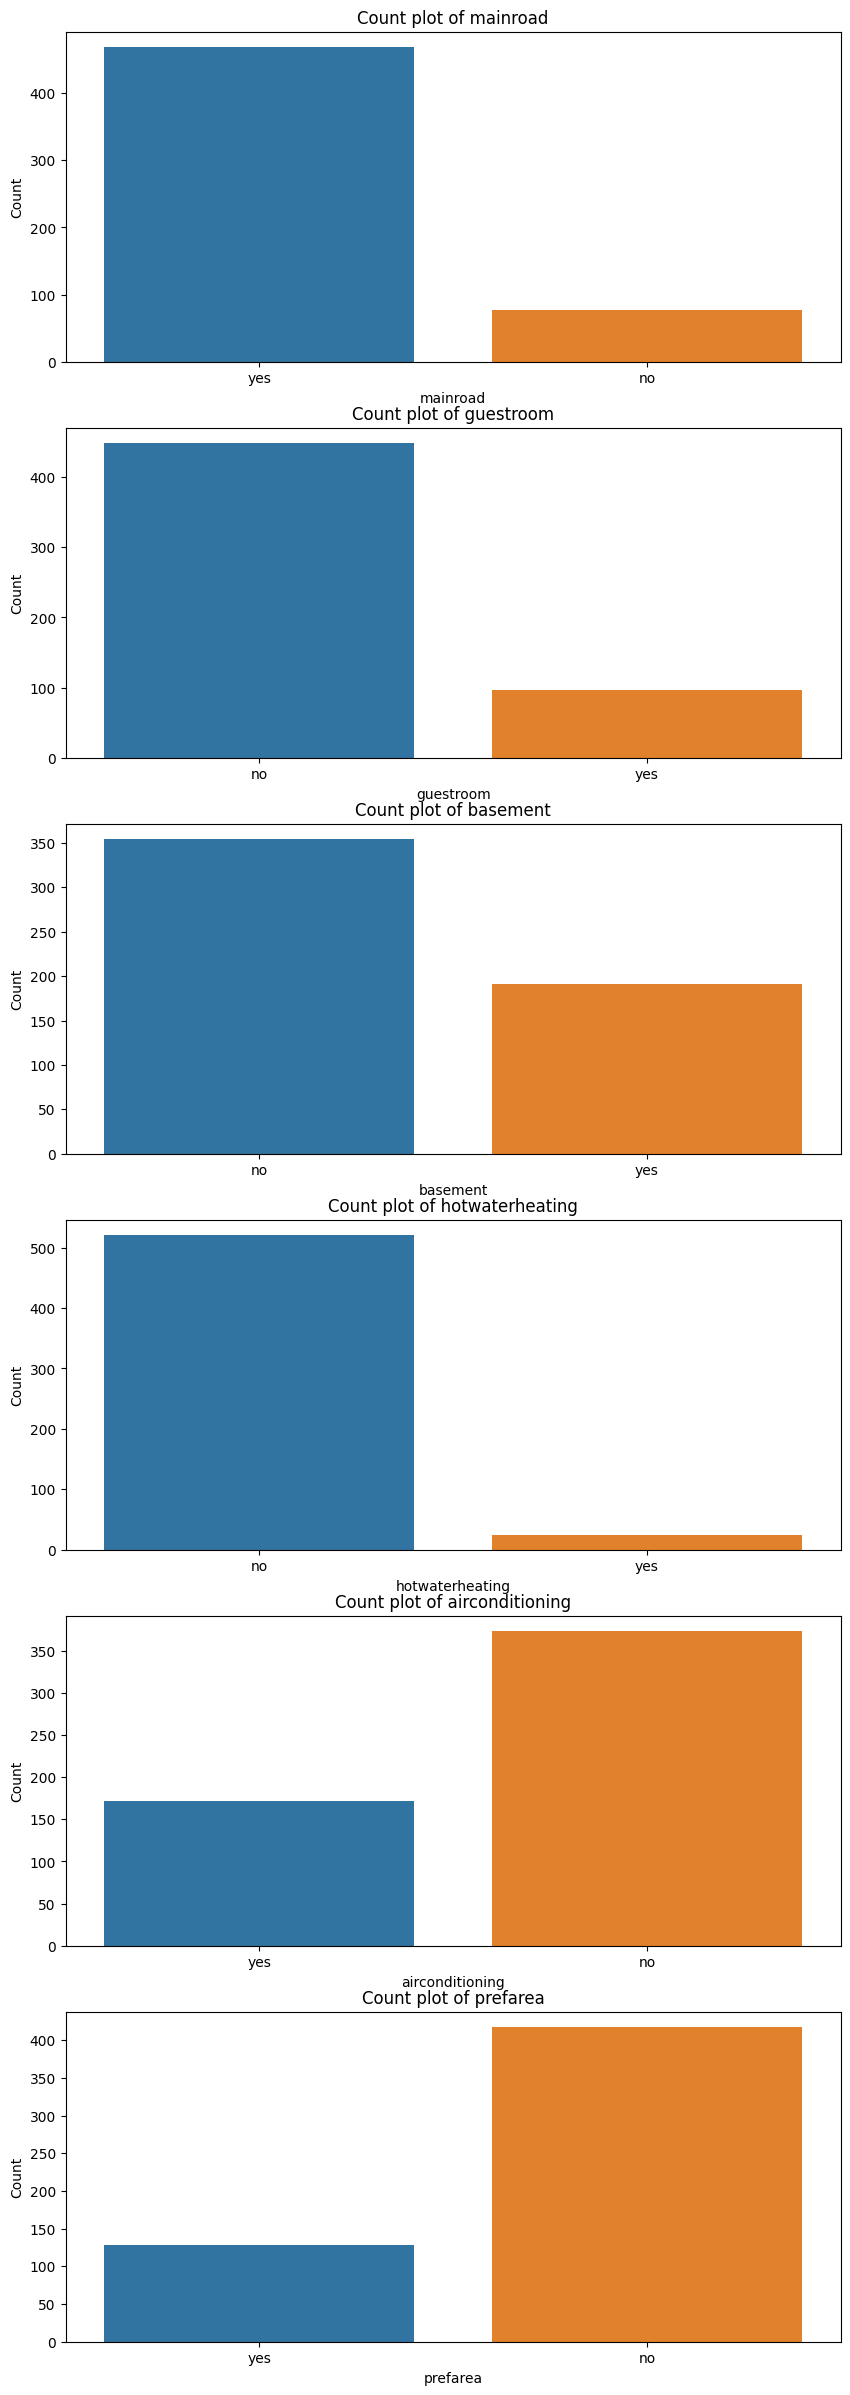

In [12]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

fig, axs = plt.subplots(len(binary_cols), 1, figsize=(10, len(binary_cols) * 5))

# Loop through binary columns and create count plots
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f'Count plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

- The above countplots are used to visualize binary data, such as `mainroad`, `airconditioning`, etc. 
- It represents the `yes` or `no` using two bars.
- This plot is useful for determining the existence of any imbalance in the data.

Text(0, 0.5, '')

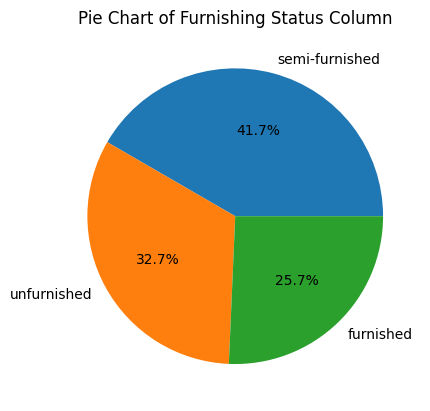

In [13]:
df['furnishingstatus'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Furnishing Status Column')
plt.ylabel('')

- The above pie chart is used to visualize the distribution of data under the `furnishingstatus` column.
- It is an effective tool for understanding data distribution and the balance in the data.

### Data Preparation

- We can see that our dataset has many columns with values as 'Yes' or 'No'.

- Such data is called 'categorical data'

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

- Data prediction models cannot read string values and hence it is necessary to encode all such values into binary values.

In [14]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#binary map function maps cat values yes and no to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[varlist] = df[varlist].apply(binary_map)

In [15]:
df # checking if categorical values have been converted into 0 and 1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


- The variable `furnishingstatus` has 3 categories `semi-furnished`, `unfurnished`, `furnished` .
- We need to convert these into integer values as well .

- We use `OneHotEncoder` function of `scikit-learn` to convert the categorical values into indicator values.
- LabelEncoder converts the string values of `furnishingstatus` into integer values 0,1,2.
- OneHotEncoder then splits the furnishing status into 3 columns, `furnished`, `semi-furnished`, `unfurnised`.

In [16]:
le = LabelEncoder()
df['furnishingstatus_encoded'] = le.fit_transform(df['furnishingstatus'])

In [17]:
ohe = OneHotEncoder(handle_unknown='ignore')

# Apply the transformation
df_encoded = ohe.fit_transform(df[['furnishingstatus']].values.reshape(-1, 1))

# Convert the result to a DataFrame
df_final = pd.DataFrame(df_encoded.toarray(), columns=ohe.get_feature_names_out(['furnishingstatus']))

# resetting index to prevent NaN values from being generated
df_final.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_final

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
540,0.0,0.0,1.0
541,0.0,1.0,0.0
542,0.0,0.0,1.0
543,1.0,0.0,0.0


In [18]:
df.drop(['furnishingstatus', 'furnishingstatus_encoded'], axis=1, inplace=True)

In [19]:
df = pd.concat([df, df_final], axis=1)

<Axes: >

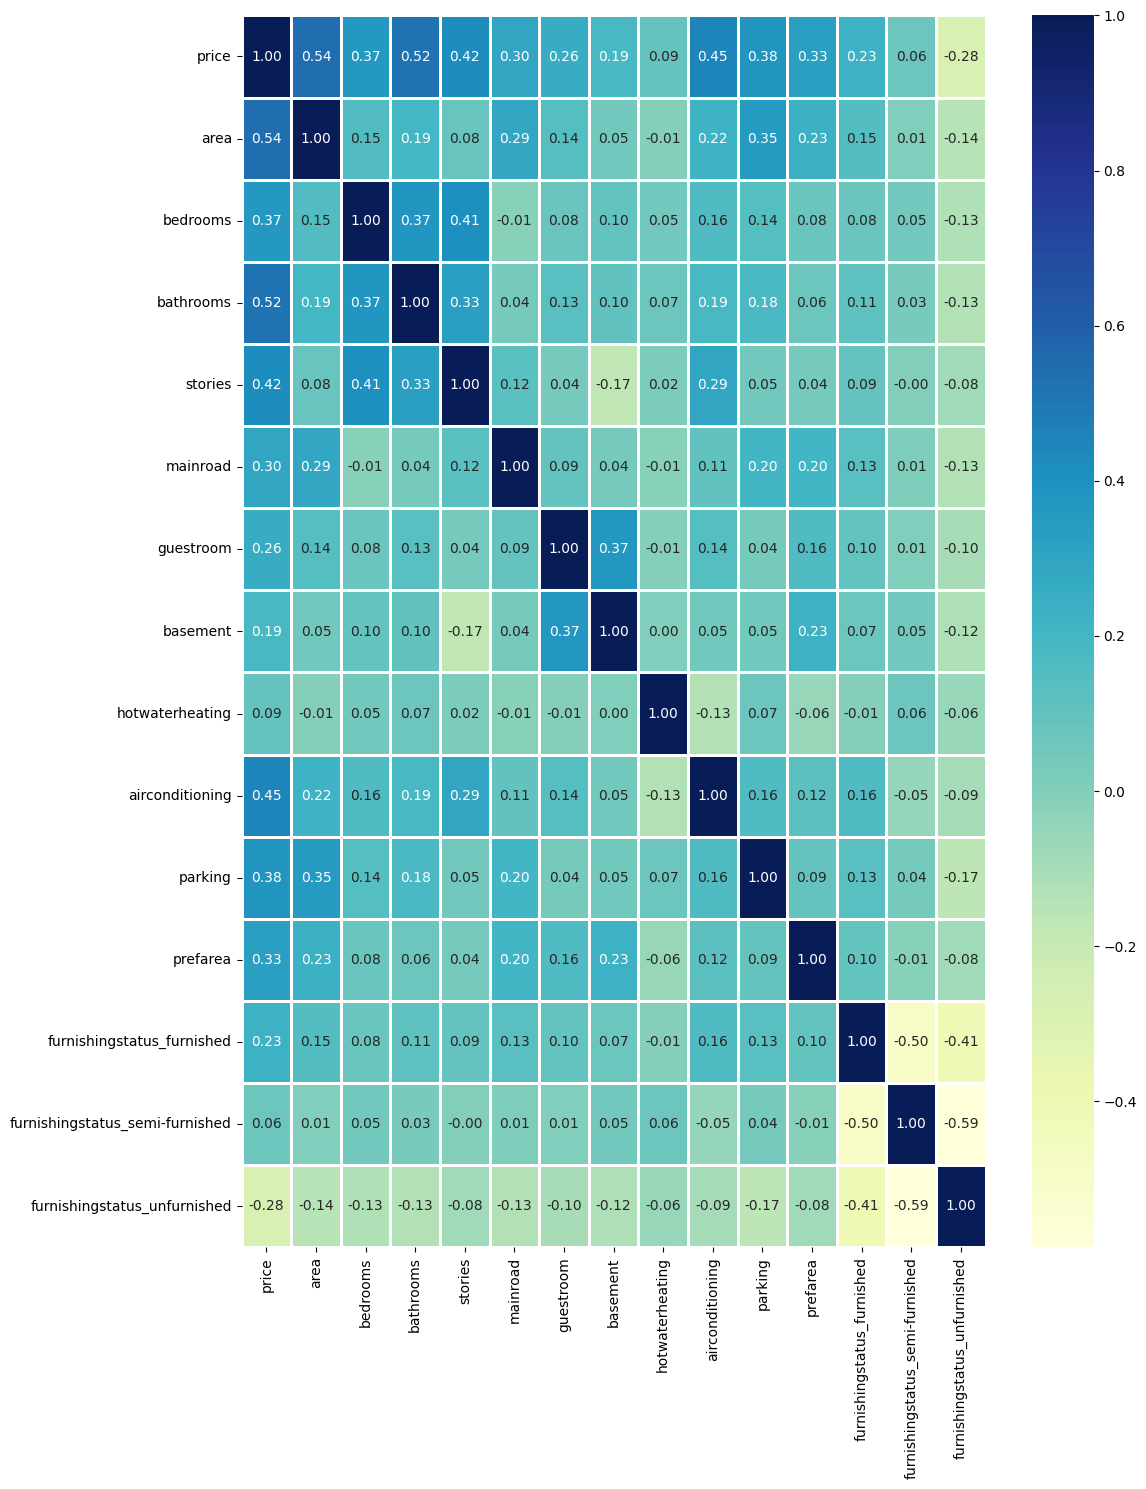

In [20]:
plt.figure(figsize = (12,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2, cmap='YlGnBu')

- This concludes the section of data preparation. We can now go ahead and split the data into training and testing sets.

### Data Splitting:

- The data is split into training and testing datasets. Basically, splitting the dataset into input features `X` and target variable `y`

- The train data is a subset of the original dataset used to train the machine learning model. It is the portion of the data that the model learns from during the training process.

- The test data is a separate subset of the original dataset used to evaluate the performance of the trained machine learning model. It is the portion of the data that the model has not seen during the training process.

#### Scaling:

- Scaling is used when the raw data contains values with different scales. For example, `price` may contain values in lakhs whereas `stories` will contain values that are at max 2 digits.
- Min-Max scaling is used in this problem.

- Formula :  $X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$

In [21]:
scaler = MinMaxScaler() 

In [22]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [23]:
X = df.drop(['price'], axis=1)
y = df['price']

# Split the training set into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [24]:
lm = LinearRegression() #
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
print(lm.intercept_)

0.009233089284277074


In [26]:
flattened_coef=lm.coef_.ravel()

In [27]:
coeff_df = pd.DataFrame(flattened_coef,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,0.318598
bedrooms,0.037122
bathrooms,0.247762
stories,0.123195
mainroad,0.034049
guestroom,0.012596
basement,0.038474
hotwaterheating,0.087469
airconditioning,0.072376
parking,0.072232


In [28]:
predictions = lm.predict(X_test)

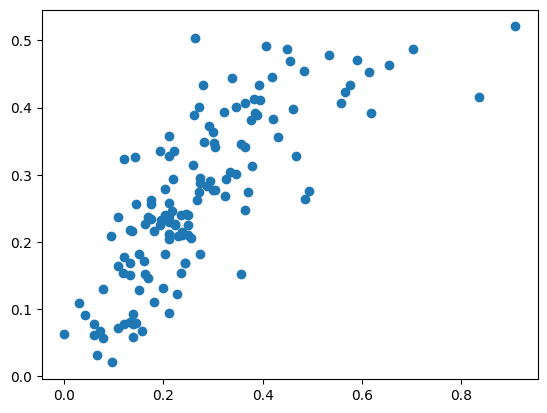

In [29]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Actual vs Predicted House Prices')

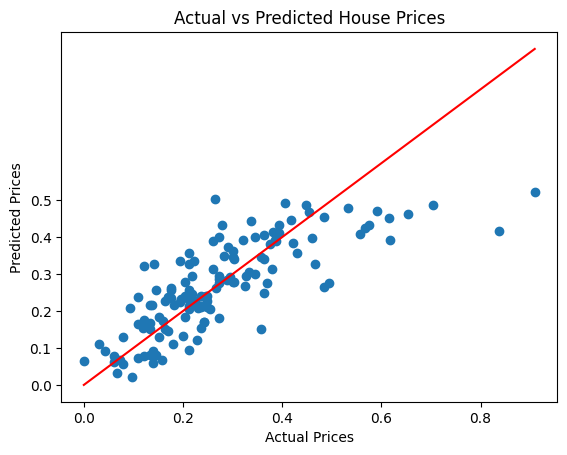

In [35]:
plt.scatter(y_test, predictions)

x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='-', label='Perfect Prediction Line')

plt.yticks(np.arange(0.0, 0.6, 0.1))

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

Text(0.5, 1.0, 'Actual vs Predicted House Prices')

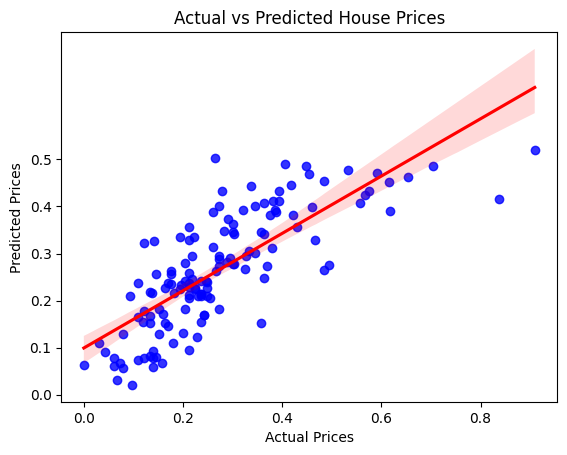

Text(0.5, 1.0, 'Actual vs Predicted House Prices')

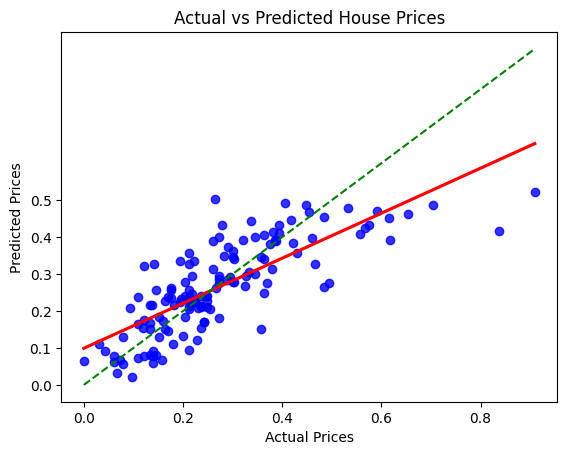

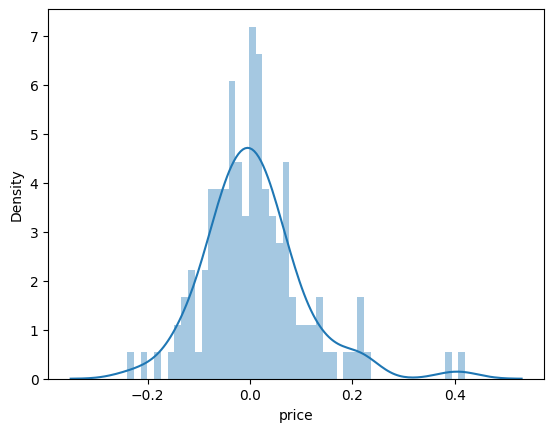

In [33]:
sns.distplot((y_test-predictions),bins=50);

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07018766704684357
MSE: 0.00964547897671491
RMSE: 0.0982113994234626
